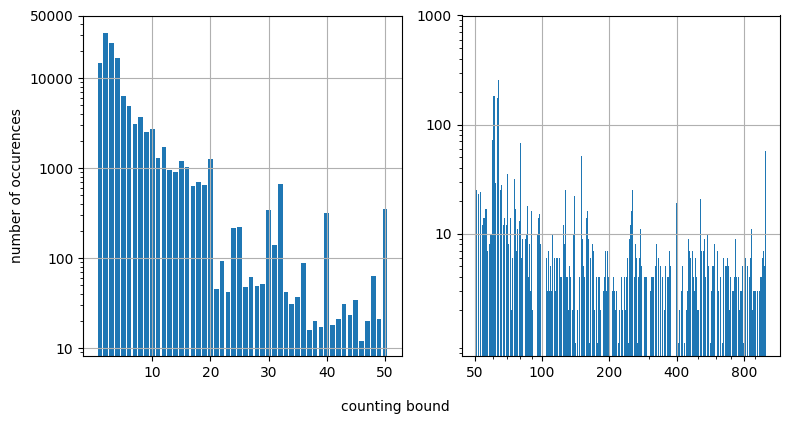

In [16]:
import matplotlib.pyplot as plt
import numpy as np
import os
import re
import argparse


def count_files_recursively(directory, minbound, maxbound):
    count_dict = {}
    for root, dirs, files in os.walk(directory):
        for file in files:
            file_path = os.path.join(root, file)
            for (number, count) in count_file(file_path).items():
                if number > minbound and number <= maxbound:
                    count_dict[number] = count_dict.get(number, 0) + count
    return count_dict


def count_file(file):
    count_dict = {}
    try:
        with open(file, "r") as f:
            text = f.read()
            pattern = r'(_ re\.loop \d+ (\d+))'
            matches = re.findall(pattern, text, re.MULTILINE)
            for (match, number) in matches:
                count_dict[int(number)] = count_dict.get(int(number), 0) + 1
    except UnicodeDecodeError:
        pass
    finally:
        return count_dict

# Create a figure and two subplots (horizontal arrangement)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))

# Sample dictionary with numerical keys and values, small count
count_data_small = count_files_recursively(
    "/home/hudh/github/ostrich/zaligvinder/models/jsa2024", 0, 50)
keys_small = list(count_data_small.keys())
values_small = list(count_data_small.values())

# Calculate exponential intervals for vertical axes
x_ticks = [10, 20, 30, 40, 50]
y_ticks = [10, 100, 1000, 10000, 50000]

# Plot the summary view
ax1.bar(keys_small, values_small, align='center')
ax1.set_yscale('log')
ax1.set_xticks(x_ticks, x_ticks)
ax1.set_yticks(y_ticks, y_ticks)
ax1.set_ylabel('number of occurences')
ax1.grid(True)

count_data_large = count_files_recursively(
    "/home/hudh/github/ostrich/zaligvinder/models/jsa2024", 50, 1000)
keys_large = list(count_data_large.keys())
values_large = list(count_data_large.values())
x_ticks = [50, 100, 200, 400, 800]
y_ticks = [10, 100, 1000]

ax2.bar(keys_large, values_large, align='center')
ax2.set_xscale('log')
ax2.set_yscale('log')
ax2.set_xticks(x_ticks, x_ticks)
ax2.set_yticks(y_ticks, y_ticks)
ax2.grid(True)
fig.text(0.5, -0.04, 'counting bound', ha='center')
plt.tight_layout()
plt.show()


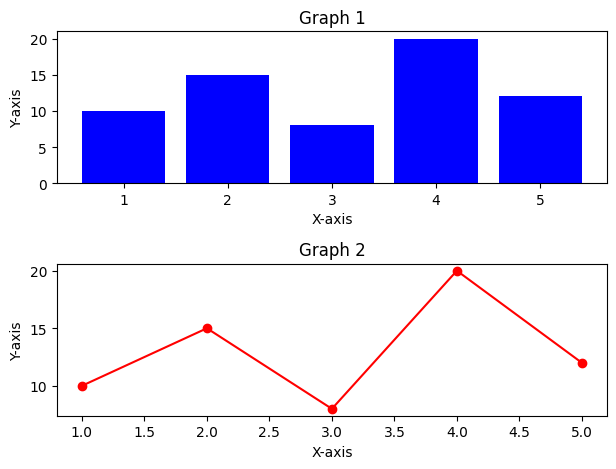

In [17]:
import matplotlib.pyplot as plt

# Sample data (dictionary)
data = {1: 10, 2: 15, 3: 8, 4: 20, 5: 12}

# Create a new figure
plt.figure()

# Plot the first graph
plt.subplot(2, 1, 1)  # Subplot 1 (rows, columns, plot_number)
plt.bar(data.keys(), data.values(), color='blue')
plt.title('Graph 1')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')

# Plot the second graph
plt.subplot(2, 1, 2)  # Subplot 2 (rows, columns, plot_number)
plt.plot(data.keys(), data.values(), color='red', marker='o')
plt.title('Graph 2')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')

# Adjust layout
plt.tight_layout()

# Display the figure
plt.show()